Sentiment Analysis Pengguna Terhadap Aplikasi Gopay

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/review_gopay.csv')
review_df.head()

,reviewId,content
0,86f1a2fc-ecf4-487f-9db6-cb9535671196,best
1,c3e70694-cec1-4c08-b715-c822990ce59f,Semoga Suka Ya Gopay
2,10f42b43-f450-45ba-a5aa-ccdd65827386,Sangat membantu
3,323d53f3-e8ee-43b0-a366-e3de585a64d9,"Aplikasi yang sangat baik, sangat membantu utk..."
4,551b4689-00c6-471f-a33a-a144106b057b,mantap 👍


In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  50000 non-null  object
 1   content   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##Text Preprocessing

In [6]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","hmmm","hmm","lah","y","nich"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


In [7]:
slangwords = {"ama": "sama", "klo": "kalau", "ttp": "tetap", "jdi": "jadi", "@": "di", "abis": "habis", "masi": "masih", "bgt": "banget", "maks": "maksimal", "ga": "tidak", "gak": "tidak", "tdk": "tidak", "gabisa": "tidak bisa", "ngalamin": "mengalami", "yg": "yang", "blum": "belum", "blom": "belum", "tf": "transfer", "bngt": "banget"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [8]:
review_df['text_clean'] = review_df['content'].apply(cleaningText)

review_df['text_casefoldingText'] = review_df['text_clean'].apply(casefoldingText)

review_df['text_slangwords'] = review_df['text_casefoldingText'].apply(fix_slangwords)

review_df['text_tokenizingText'] = review_df['text_slangwords'].apply(tokenizingText)

review_df['text_stopword'] = review_df['text_tokenizingText'].apply(filteringText)

review_df['text_akhir'] = review_df['text_stopword'].apply(toSentence)

In [9]:
review_df.head()

,reviewId,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,86f1a2fc-ecf4-487f-9db6-cb9535671196,best,best,best,best,[best],[best],best
1,c3e70694-cec1-4c08-b715-c822990ce59f,Semoga Suka Ya Gopay,Semoga Suka Ya Gopay,semoga suka ya gopay,semoga suka ya gopay,"[semoga, suka, ya, gopay]","[semoga, suka, gopay]",semoga suka gopay
2,10f42b43-f450-45ba-a5aa-ccdd65827386,Sangat membantu,Sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],membantu
3,323d53f3-e8ee-43b0-a366-e3de585a64d9,"Aplikasi yang sangat baik, sangat membantu utk...",Aplikasi yang sangat baik sangat membantu utk ...,aplikasi yang sangat baik sangat membantu utk ...,aplikasi yang sangat baik sangat membantu utk ...,"[aplikasi, yang, sangat, baik, sangat, membant...","[aplikasi, membantu, utk, transaksi, keuangan,...",aplikasi membantu utk transaksi keuangan trans...
4,551b4689-00c6-471f-a33a-a144106b057b,mantap 👍,mantap,mantap,mantap,[mantap],[mantap],mantap


In [10]:
review_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/cleanreview.csv', index=0)

##Skema Pelatihan


```
Labeling: Indonesian Lexicon
Pembagian Data: train 80%, test 20%
Feature Extraction: TF-IDF
Modeling: 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine'
```

In [ ]:
clean_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gopay_SentimentAnalysis/Dataset/cleanreview.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   content               50000 non-null  object
 2   text_clean            49332 non-null  object
 3   text_casefoldingText  49332 non-null  object
 4   text_slangwords       49332 non-null  object
 5   text_tokenizingText   50000 non-null  object
 6   text_stopword         50000 non-null  object
 7   text_akhir            48426 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [ ]:
import ast
clean_df['text_stopword'] = clean_df['text_stopword'].apply(lambda x: np.array(ast.literal_eval(x.strip())))
clean_df = clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48426 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48426 non-null  object
 1   content               48426 non-null  object
 2   text_clean            48426 non-null  object
 3   text_casefoldingText  48426 non-null  object
 4   text_slangwords       48426 non-null  object
 5   text_tokenizingText   48426 non-null  object
 6   text_stopword         48426 non-null  object
 7   text_akhir            48426 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


###Labeling

In [ ]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'

    elif (score < 0):
        polarity = 'negative'

    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    25245
negative    12489
neutral     10692
Name: count, dtype: int64


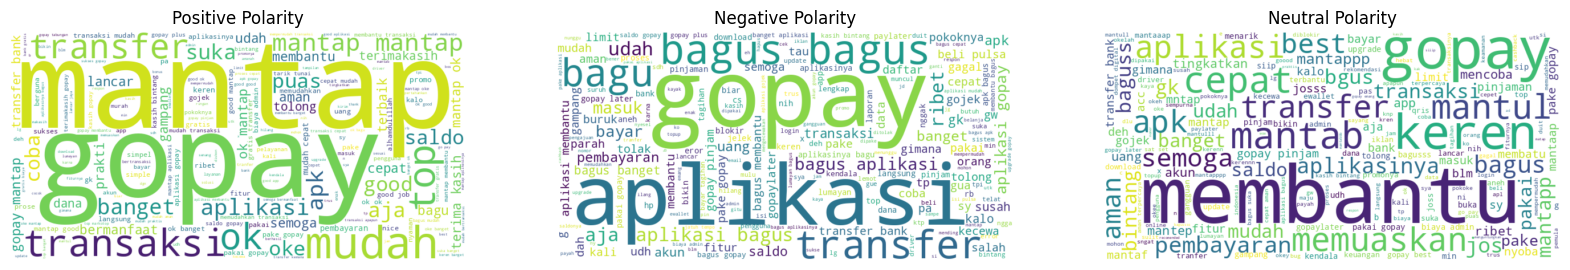

In [ ]:
# Filter positive and negative texts
positive_texts = " ".join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])
negative_texts = " ".join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])
neutral_texts = " ".join(clean_df[clean_df['polarity'] == 'neutral']['text_akhir'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)


# Display the word clouds
plt.figure(figsize=(20, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.title("Positive Polarity")
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 2)
plt.title("Negative Polarity")
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 3)
plt.title("Neutral Polarity")
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

###Data Splitting and Feature Extraction

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

###Modeling

Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

naive_bayes = BernoulliNB()

naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8456633970056788
Naive Bayes - accuracy_test: 0.8353293413173652


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train.toarray(), y_train)

y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9499741868869386
Decision Tree - accuracy_test: 0.8518480280817675


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9499741868869386
Random Forest - accuracy_test: 0.8787941358661986


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.8945276200309757
Logistic Regression - accuracy_test: 0.885711335948792


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train.toarray(), y_train)

y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print('Support Vector Machine - accuracy_train:', accuracy_train_svm)
print('Support Vector Machine - accuracy_test:', accuracy_test_svm)

Support Vector Machine - accuracy_train: 0.9183014971605575
Support Vector Machine - accuracy_test: 0.8845756762337394


In [ ]:
results_df = pd.DataFrame({
    'model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine'],
    'accuarcy_train': [accuracy_train_nb, accuracy_train_dt, accuracy_train_rf, accuracy_train_lr, accuracy_train_svm],
    'accuracy_test': [accuracy_test_nb, accuracy_test_dt, accuracy_test_rf, accuracy_test_lr, accuracy_test_svm]
})

results_df

,model,accuarcy_train,accuracy_test
0,Naive Bayes,0.845663,0.835329
1,Decision Tree,0.949974,0.851848
2,Random Forest,0.949974,0.878794
3,Logistic Regression,0.894528,0.885711
4,Support Vector Machine,0.918301,0.884576


###Inference Cell

In [ ]:
kalimat_test = input("Pendapatmu terhadap aplikasi Gopay:")

# Preprocessing pada ulasan pengguna
kalimat_final = cleaningText(kalimat_test)
kalimat_final = casefoldingText(kalimat_final)
kalimat_final = fix_slangwords(kalimat_final)
kalimat_final = tokenizingText(kalimat_final)
kalimat_final = filteringText(kalimat_final)
kalimat_final = toSentence(kalimat_final)

X_kalimat = tfidf.transform({kalimat_final})

pred_kalimat_nb = naive_bayes.predict(X_kalimat)
pred_kalimat_dt = decision_tree.predict(X_kalimat)
pred_kalimat_rf = random_forest.predict(X_kalimat)
pred_kalimat_lr = logistic_regression.predict(X_kalimat)
pred_kalimat_svm = svm_model.predict(X_kalimat.toarray())

print('Naive Bayes Result:', pred_kalimat_nb)
print('Decision Tree Result:', pred_kalimat_dt)
print('Random Forest Result:', pred_kalimat_rf)
print('Logistic Regression Result:', pred_kalimat_lr)
print('Support Vector Machine Result:', pred_kalimat_svm)

Pendapatmu terhadap aplikasi Gopay:Aplikasi sangat memudahkan transaksi sehari-hari. Walaupun terkadang nge-lag
Naive Bayes Result: ['positive']
Decision Tree Result: ['positive']
Random Forest Result: ['positive']
Logistic Regression Result: ['positive']
Support Vector Machine Result: ['positive']
